# Application of SOCP AC-OPF in the Wind farm-related power distribution network access an ESS

In [ ]:
using MAT, JuMP, PowerModels, CPLEX, Plots
#model = Model(CPLEX.Optimizer)

# Quick Comparison of Several Relaxation Methods

In [84]:
network_data = PowerModels.parse_file("D:/asu/IEE 598/Project/case30.m");

[info | PowerModels]: extending matpower format with data: pload_prim 29x2
[info | PowerModels]: extending matpower format with data: qload_prim 29x2
[info | PowerModels]: extending matpower format with data: wind 1x25
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 24 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 24 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 4 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 4 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 1 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 d

[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 21 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 21 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 38 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 38 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 7 from -360.0 to -60.0 deg.
[warn | PowerModels]: this code only supports angmax values in -90 deg. to 90 deg., tightening the value on branch 7 from 360.0 to 60.0 deg.
[warn | PowerModels]: this code only supports angmin values in -90 deg. to 90 deg., tightening the value on branch 34 from -360.0 to -60.0 deg.


LoadError: The solver does not support nonlinear problems (i.e., NLobjective and NLconstraint).

In [3]:
ACP = instantiate_model(network_data, ACPPowerModel, PowerModels.build_opf);
result = optimize_model!(ACP, optimizer=CPLEX.Optimizer);

LoadError: The solver does not support nonlinear problems (i.e., NLobjective and NLconstraint).

In [4]:
LPACC = instantiate_model(network_data,LPACCPowerModel, PowerModels.build_opf);
LPACC_result = optimize_model!(LPACC, optimizer=CPLEX.Optimizer)
LPACC_time = LPACC_result["solve_time"]

Version identifier: 20.1.0.0 | 2020-11-10 | 9bedb6d68
Tried aggregator 1 time.
QCP Presolve eliminated 17 rows and 8 columns.
Aggregator did 47 substitutions.
Reduced QCP has 894 rows, 457 columns, and 1938 nonzeros.
Reduced QCP has 145 quadratic constraints.
Presolve time = 0.00 sec. (0.37 ticks)
Parallel mode: using up to 6 threads for barrier.

***NOTE: Found 4 dense columns.

Number of nonzeros in lower triangle of A*A' = 7704
Using Approximate Minimum Degree ordering
Total time for automatic ordering = 0.00 sec. (0.36 ticks)
Summary statistics for Cholesky factor:
  Threads                   = 6
  Rows in Factor            = 894
  Integer space required    = 2126
  Total non-zeros in factor = 12010
  Total FP ops to factor    = 256718
 Itn      Primal Obj        Dual Obj  Prim Inf Upper Inf  Dual Inf Inf Ratio
   0   1.1018284e+03  -1.0000000e+00  2.15e+03  0.00e+00  2.23e+03  1.00e+00
   1   1.0766047e+03  -1.7267456e+01  2.15e+03  0.00e+00  2.23e+03  9.65e-01
   2   4.8679250e+0

0.054000139236450195

In [5]:
SOCWR = instantiate_model(network_data,SOCWRPowerModel, PowerModels.build_opf);
SOCWR_result = optimize_model!(SOCWR, optimizer=CPLEX.Optimizer)
SOCWR_time = SOCWR_result["solve_time"]

CPLEX Error  3003: Not a mixed-integer problem.
Version identifier: 20.1.0.0 | 2020-11-10 | 9bedb6d68
Tried aggregator 1 time.
QCP Presolve eliminated 111 rows and 8 columns.
Aggregator did 10 substitutions.
Reduced QCP has 949 rows, 522 columns, and 1873 nonzeros.
Reduced QCP has 121 quadratic constraints.
Presolve time = 0.00 sec. (0.38 ticks)
Parallel mode: using up to 6 threads for barrier.

***NOTE: Found 5 dense columns.

Number of nonzeros in lower triangle of A*A' = 6140
Using Approximate Minimum Degree ordering
Total time for automatic ordering = 0.00 sec. (0.27 ticks)
Summary statistics for Cholesky factor:
  Threads                   = 6
  Rows in Factor            = 954
  Integer space required    = 1839
  Total non-zeros in factor = 10865
  Total FP ops to factor    = 151721
 Itn      Primal Obj        Dual Obj  Prim Inf Upper Inf  Dual Inf Inf Ratio
   0   1.1018284e+03  -1.0000000e+00  1.10e+03  0.00e+00  2.25e+03  1.00e+00
   1   1.0763491e+03  -1.7544111e+01  1.10e+03 

0.03500008583068848

In [6]:
QCRM = instantiate_model(network_data,QCRMPowerModel, PowerModels.build_opf);
QCRM_result = optimize_model!(QCRM, optimizer=CPLEX.Optimizer)
QCRM_time = QCRM_result["solve_time"]

CPLEX Error  3003: Not a mixed-integer problem.
Version identifier: 20.1.0.0 | 2020-11-10 | 9bedb6d68
Tried aggregator 1 time.
QCP Presolve eliminated 216 rows and 12 columns.
Aggregator did 107 substitutions.
Reduced QCP has 1994 rows, 869 columns, and 4179 nonzeros.
Reduced QCP has 192 quadratic constraints.
Presolve time = 0.00 sec. (0.95 ticks)
Parallel mode: using up to 6 threads for barrier.

***NOTE: Found 9 dense columns.

Number of nonzeros in lower triangle of A*A' = 17648
Using Approximate Minimum Degree ordering
Total time for automatic ordering = 0.00 sec. (0.72 ticks)
Summary statistics for Cholesky factor:
  Threads                   = 6
  Rows in Factor            = 1994
  Integer space required    = 4414
  Total non-zeros in factor = 27846
  Total FP ops to factor    = 479198
 Itn      Primal Obj        Dual Obj  Prim Inf Upper Inf  Dual Inf Inf Ratio
   0   1.1018284e+03  -1.0000000e+00  6.48e+03  0.00e+00  3.36e+03  1.00e+00
   1   1.0866865e+03  -6.6689252e+00  6.48

0.0820000171661377

In [7]:
QCLS = instantiate_model(network_data,QCLSPowerModel, PowerModels.build_opf);
QCLS_result = optimize_model!(QCLS, optimizer=CPLEX.Optimizer)
QCLS_time = QCLS_result["solve_time"]

CPLEX Error  3003: Not a mixed-integer problem.
Version identifier: 20.1.0.0 | 2020-11-10 | 9bedb6d68
Tried aggregator 1 time.
QCP Presolve eliminated 216 rows and 12 columns.
Aggregator did 107 substitutions.
Reduced QCP has 2568 rows, 1484 columns, and 7585 nonzeros.
Reduced QCP has 192 quadratic constraints.
Presolve time = 0.00 sec. (1.30 ticks)
Parallel mode: using up to 6 threads for barrier.

***NOTE: Found 7 dense columns.

Number of nonzeros in lower triangle of A*A' = 15448
Using Approximate Minimum Degree ordering
Total time for automatic ordering = 0.00 sec. (1.00 ticks)
Summary statistics for Cholesky factor:
  Threads                   = 6
  Rows in Factor            = 2568
  Integer space required    = 4887
  Total non-zeros in factor = 30568
  Total FP ops to factor    = 444702
 Itn      Primal Obj        Dual Obj  Prim Inf Upper Inf  Dual Inf Inf Ratio
   0   1.1018284e+03  -1.0000000e+00  8.54e+03  0.00e+00  4.10e+03  1.00e+00
   1   1.0946427e+03  -2.7631699e+00  8.5

0.07800006866455078

In [8]:
print("solve time of LPACC is ", LPACC_time,"\n")
print("solve time of SOCWR is ", SOCWR_time,"\n")
print("solve time of QCRM is ", QCRM_time,"\n")
print("solve time of QCLS is ", QCLS_time,"\n")

solve time of LPACC is 0.054000139236450195
solve time of SOCWR is 0.03500008583068848
solve time of QCRM is 0.0820000171661377
solve time of QCLS is 0.07800006866455078


# the Wind farm-related power distribution network access an ESS

In [30]:
case33bw = matopen("D:/asu/IEE 598/Project/case33bw.mat")
mpc = read(case33bw, "ans")
wind = [0.9 1.0 0.95 0.9 0.8 0.79 0.76  0.75 0.55 0.35 0.45 0.43 0.35 0.32 0.30 0.33 0.35 0.43 0.55 0.72 0.75 0.79 0.82 0.95]
T = 24
nb = 33     ## wind power in 24 hours       
nl = 32     

32

## Wind Power in 24 Hours

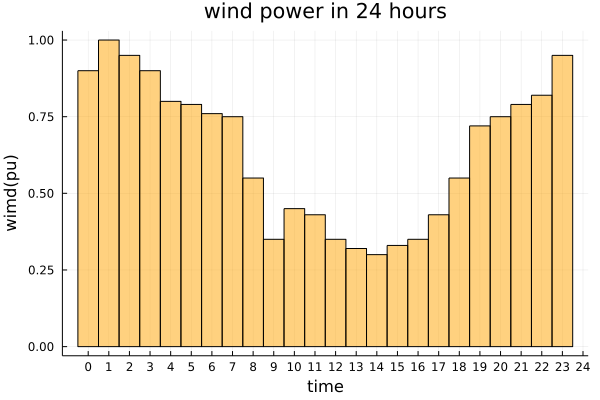

In [72]:
x_T = [0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
y_bus = [ 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
x = x_T; y = wind; # These are the plotting data
wind_power_fig = bar(x, y,xticks=0:25, bar_width=1,fillcolor=:"orange", fillalpha=0.5, legend=false,xlabel = "time",ylabel = "wimd(pu)",title = "wind power in 24 hours")
Plots.savefig(wind_power_fig,"D:/asu/IEE 598/Project/Figure/wind_power_fig.png")
wind_power_fig## wind power in 24 hours

## General model 

In [14]:
function essopt(essbusb)
    model = Model(CPLEX.Optimizer)
    case33bw = matopen("D:/asu/IEE 598/Project/case33bw.mat")
    mpc = read(case33bw, "ans")
    
    wind = [0.9 1.0 0.95 0.9 0.8 0.79 0.76  0.75 0.55 0.35 0.45 0.43 0.35 0.32 0.30 0.33 0.35 0.43 0.55 0.72 0.75 0.79 0.82 0.95]
    
    pload = [1.8 1.35 1.2 1.15 1.1 1.35 1.45 1.5 1.65 1.9 2.0 2.1 2.35 2.55 2.25 2.15 2.3 2.6 3.35 3.85 4.0 3.6 3.25 2.7]

    T = 24
    nb = 33            
    nl = 32           
    nsvc = 3
    ncb = 2
    noltc = 1   
    nwt = 2   
    ness = 1
    upstream = zeros(nb,nl)
    dnstream = zeros(nb,nl)
    essbusa = nb - essbusb - 1
    

    bus = mpc["bus"][:,1:4]
    Pd = bus[:,3]/1e3
    Qd = bus[:,4]/1e3
    pload_prim = zeros(nb,1)
    pload_prim[1:32] = Pd[2:33]
    Qd = bus[:,4]/1e3
    qload_prim = zeros(nb,1)
    qload_prim[1:32] = Qd[2:33]
    a = 3.715; 
    b = 2.3;
    pload = pload/a 
    qload = pload/b
    pload = pload_prim * pload
    qload = qload_prim * qload

    branch = mpc["branch"][1:32,:]
    branch[:,3:4] .= branch[:,3:4]*1/(12.66^2)
    R = branch[:,3]
    X = branch[:,4]

    upstream = zeros(nb,nl)
    dnstream = zeros(nb,nl)

    for i = 1:nl
        upstream[i,i]=1;
    end

    for i = 1:16
        dnstream[i,i+1]=1;
    end

    for i = 18:20
        dnstream[i,i+1]=1;
    end
    
    for i = 22:23
        dnstream[i,i+1]=1;
    end

    for i = 25:31
        dnstream[i,i+1]=1;
    end

    dnstream[1,18] = 1
    dnstream[2,22] = 1
    dnstream[5,25] = 1
    dnstream[33,1] = 1

    Vmax = [1.06*1.06*ones(nb-1,T)
            1.06*1.06*ones(1,T)]
    Vmin = [0.94*0.94*ones(nb-1,T)
            0.94*0.94*ones(1,T)]
    Pgmax = [zeros(nb-1,T)
             5*ones(1,T)]
    Pgmin = [zeros(nb-1,T)
             0*ones(1,T)]
    Qgmax = [zeros(nb-1,T)
             3*ones(1,T)]
    Qgmin = [zeros(nb-1,T)
             -1*ones(1,T)]
    QCB_step = 100/1000
    
    @variable(model, V[1:nb,1:T])
    @variable(model, I[1:nl,1:T])
    @variable(model, P[1:nl,1:T])
    @variable(model, Q[1:nl,1:T])
    @variable(model, Pg[1:nb,1:T])
    @variable(model, Qg[1:nb,1:T])
    @variable(model, theta_CB[1:ncb,1:T,1:5],Bin )
    @variable(model, theta_IN[1:ncb,1:T], Bin )
    @variable(model, theta_DE[1:ncb,1:T], Bin )  

    @variable(model, q_SVC[1:nsvc,1:T])
    @variable(model, p_wt[1:nwt,1:T])
    
    @variable(model, p_dch[1:ness,1:T])
    @variable(model, p_ch[1:ness,1:T])
    @variable(model, u_dch[1:ness,1:T], Bin)
    @variable(model, u_ch[1:ness,1:T], Bin)
    @variable(model, E_ess[1:ness,1:25])

    @variable(model, r1[1:noltc,1:T])
    @variable(model, theta_OLTC[1:noltc,1:T,1:12], Bin )
    @variable(model, theta1_IN[1:noltc,1:T], Bin)
    @variable(model, theta1_DE[1:noltc,1:T], Bin)
    
    @constraint(model,ess1, u_dch + u_ch .<= 1)

    @constraint(model,ess2, p_dch[1,:] .>= 0)
    @constraint(model,ess3, p_dch[1,:] - u_dch[1,:]*0.3 .<= 0)
    @constraint(model,ess4, p_ch[1,:] .>= 0)
    @constraint(model,ess5, p_ch[1,:] - u_ch[1,:]*0.3 .<= 0)

    ess6 = @constraint(model, [i = 1:24],  E_ess[:,i+1] .== E_ess[:,i] + 0.9*p_ch[:,i] - 1.11*p_dch[:,i], base_name = "ess10")

    @constraint(model,ess7,E_ess[:,1] .== E_ess[:,25])
    @constraint(model,ess8, 0.18 .<= E_ess[1,:] .<= 1.8)


    P_dch = [zeros(essbusb,T)
            transpose(p_dch[1,:])
            zeros(essbusa,T)]

    P_ch = [zeros(essbusb,T)
            transpose(p_ch[1,:])
            zeros(essbusa,T)]
    
    @constraint(model,wind1, 0 .<= p_wt .<= ones(2,1)*wind)

    P_wt = [zeros(16,T)
            transpose(p_wt[1,:])
            zeros(14,T)
            transpose(p_wt[2,:])
            zeros(1,T)]
    
    rjs = zeros(1,12)

    for i = 1:12
        rjs[1,i] = (0.93+(i+1)*0.01)^2 -(i*0.01+0.93)^2;
    end

    oltc1 = @constraint(model, [i = 1:24],  r1[1,i] .== 0.94^2+ sum(rjs.*theta_OLTC[1,i,:]), base_name = "oltc1")
    oltc2 = @constraint(model, [i = 1:11],  theta_OLTC[:,:,i] .>= theta_OLTC[:,:,i+1], base_name = "oltc2")

    @constraint(model,oltc3, V[33,:] .== r1)
    @constraint(model,oltc4, theta1_IN + theta1_DE .<= 1)

    k = sum(theta_OLTC, dims = 3)

    oltc5 = @constraint(model, [i = 1:T-1], k[:,i+1] - k[:,i] .<= theta1_IN[:,i]*12 - theta1_DE[:,i], base_name = "oltc5")
    oltc6 = @constraint(model, [i = 1:T-1], k[:,i+1] - k[:,i] .>= theta1_IN[:,i] - theta1_DE[:,i]*12 , base_name = "oltc6")

    @constraint(model,oltc7, sum(theta1_IN + theta1_DE, dims = 2) .<= 5)
    
    @constraint(model,svc1, -0.1 .<= q_SVC .<= 0.3)

    Q_SVC = [zeros(4,T)
            transpose(q_SVC[1,:])
            zeros(9,T)
            transpose(q_SVC[2,:])
            zeros(15,T)
            transpose(q_SVC[3,:])
            zeros(2,T)]  
    
    Q_cb = sum(theta_CB,dims = 3) .* QCB_step

    Q_CB = [zeros(4,T)
            transpose(Q_cb[1,:])
            zeros(9,T)
            transpose(Q_cb[2,:])
            zeros(18,T)]

    cb1 = @constraint(model,[i = 1:4], theta_CB[:,:,i] .>= theta_CB[:,:,i+1], base_name = "cb1")

    @constraint(model,cb2, theta_IN + theta_DE .<= 1)

    kk = sum(theta_CB,dims = 3)

    cb3 = @constraint(model, [i = 1:T-1], kk[:,i+1] - kk[:,i] .<= theta1_IN[:,i]*5 - theta1_DE[:,i], base_name = "cb3")
    cb4 = @constraint(model, [i = 1:T-1], kk[:,i+1] - kk[:,i] .>= theta1_IN[:,i] - theta1_DE[:,i]*5 , base_name = "ocb4")

    @constraint(model,cb5, sum(theta1_IN + theta1_DE, dims = 2) .<= 5)
    
    Pin = -upstream*P + upstream*(I.*(R*ones(1,T))) + dnstream*P
    Qin = -upstream*Q + upstream*(I.*(X*ones(1,T))) + dnstream*Q

    @constraint(model,bpf1, Pin + pload - Pg - P_wt - P_dch + P_ch .== 0)
    @constraint(model,bpf2, Qin + qload - Qg - Q_SVC - Q_CB .== 0)
    
    @constraint(model,om, V[convert(Vector{Int}, real(branch[:,2])),:] .== V[convert(Vector{Int}, real(branch[:,1])),:] - 2*(R*ones(1,24)).*P - 2*(X*ones(1,24)).*Q + ((R.^2 + X.^2)*ones(1,24)).*I)
    
    @constraint(model,scocp, V[convert(Vector{Int}, real(branch[:,1])),:].*I .>= P.^2 + Q.^2)
    
    @constraint(model,busv,Vmin .<= V .<= Vmax)
    
    @constraint(model,genvp,Pgmin .<= Pg .<= Pgmax)
    @constraint(model,genvq,Qgmin .<= Qg .<= Qgmax)
    
    @constraint(model,branchi,0 .<= I .<= 10)
    
    @objective(model, Min, sum(Pg[33,:])  +  0.3*sum(sum(I.*(R*ones(1,T)))))
    
    optimize!(model)
    
    result = Dict("TerminationStatus" => termination_status(model),
        "PrimalStatus" => primal_status(model),
        "DualStatus" => dual_status(model),
        "ObjectiveValue" => objective_value(model),
        "result_V" => JuMP.value.(V),
        "result_I" => JuMP.value.(I),
        "result_P" => JuMP.value.(P),
        "result_Q" => JuMP.value.(Q),
        "result_Pg" => JuMP.value.(Pg),
        "result_Qg" => JuMP.value.(Qg),
        "result_theta_CB" => JuMP.value.(theta_CB),
        "result_theta_IN"=> JuMP.value.(theta_IN),
        "result_theta_DE" => JuMP.value.(theta_DE),
        "result_q_SVC" => JuMP.value.(q_SVC),
        "result_p_wt" => JuMP.value.(p_wt),
        "result_p_dch" => JuMP.value.(p_dch),
        "result_p_ch" => JuMP.value.(p_ch),
        "result_u_dch" => JuMP.value.(u_dch),
        "result_u_ch" => JuMP.value.(u_ch),
        "result_E_ess" => JuMP.value.(E_ess),
        "result_r1" => JuMP.value.(r1),
        "result_theta_OLTC" => JuMP.value.(theta_OLTC),
        "result_theta_IN" => JuMP.value.(theta_IN),
        "result_theta_DE" => JuMP.value.(theta_DE))
    
    return result
    
end

essopt (generic function with 1 method)

## Model at 1 Bus

In [15]:
function essopt1()
    model = Model(CPLEX.Optimizer)
    case33bw = matopen("D:/asu/IEE 598/Project/case33bw.mat")
    mpc = read(case33bw, "ans")
    

    wind = [0.9 1.0 0.95 0.9 0.8 0.79 0.76  0.75 0.55 0.35 0.45 0.43 0.35 0.32 0.30 0.33 0.35 0.43 0.55 0.72 0.75 0.79 0.82 0.95]

    pload = [1.8 1.35 1.2 1.15 1.1 1.35 1.45 1.5 1.65 1.9 2.0 2.1 2.35 2.55 2.25 2.15 2.3 2.6 3.35 3.85 4.0 3.6 3.25 2.7]

    T = 24
    nb = 33            
    nl = 32           
    nsvc = 3
    ncb = 2
    noltc = 1   
    nwt = 2   
    ness = 1
    upstream = zeros(nb,nl)
    dnstream = zeros(nb,nl)
    

    bus = mpc["bus"][:,1:4]
    Pd = bus[:,3]/1e3
    Qd = bus[:,4]/1e3
    pload_prim = zeros(nb,1)
    pload_prim[1:32] = Pd[2:33]
    Qd = bus[:,4]/1e3
    qload_prim = zeros(nb,1)
    qload_prim[1:32] = Qd[2:33]
    a = 3.715;   #单时段所有节点有功容量,MW
    b = 2.3;
    pload = pload/a 
    qload = pload/b
    pload = pload_prim * pload
    qload = qload_prim * qload

    branch = mpc["branch"][1:32,:]
    branch[:,3:4] .= branch[:,3:4]*1/(12.66^2)
    R = branch[:,3]
    X = branch[:,4]

    upstream = zeros(nb,nl)
    dnstream = zeros(nb,nl)

    for i = 1:nl
        upstream[i,i]=1;
    end

    for i = 1:16
        dnstream[i,i+1]=1;
    end

    for i = 18:20
        dnstream[i,i+1]=1;
    end
    
    for i = 22:23
        dnstream[i,i+1]=1;
    end

    for i = 25:31
        dnstream[i,i+1]=1;
    end

    dnstream[1,18] = 1
    dnstream[2,22] = 1
    dnstream[5,25] = 1
    dnstream[33,1] = 1

    Vmax = [1.06*1.06*ones(nb-1,T)
            1.06*1.06*ones(1,T)]
    Vmin = [0.94*0.94*ones(nb-1,T)
            0.94*0.94*ones(1,T)]
    Pgmax = [zeros(nb-1,T)
             5*ones(1,T)]
    Pgmin = [zeros(nb-1,T)
             0*ones(1,T)]
    Qgmax = [zeros(nb-1,T)
             3*ones(1,T)]
    Qgmin = [zeros(nb-1,T)
             -1*ones(1,T)]
    QCB_step = 100/1000
    
    @variable(model, V[1:nb,1:T])
    @variable(model, I[1:nl,1:T])
    @variable(model, P[1:nl,1:T])
    @variable(model, Q[1:nl,1:T])
    @variable(model, Pg[1:nb,1:T])
    @variable(model, Qg[1:nb,1:T])
    @variable(model, theta_CB[1:ncb,1:T,1:5],Bin )
    @variable(model, theta_IN[1:ncb,1:T], Bin )
    @variable(model, theta_DE[1:ncb,1:T], Bin ) 

    @variable(model, q_SVC[1:nsvc,1:T])
    @variable(model, p_wt[1:nwt,1:T])
    
    @variable(model, p_dch[1:ness,1:T])
    @variable(model, p_ch[1:ness,1:T])
    @variable(model, u_dch[1:ness,1:T], Bin)
    @variable(model, u_ch[1:ness,1:T], Bin)
    @variable(model, E_ess[1:ness,1:25])

    @variable(model, r1[1:noltc,1:T])
    @variable(model, theta_OLTC[1:noltc,1:T,1:12], Bin )
    @variable(model, theta1_IN[1:noltc,1:T], Bin)
    @variable(model, theta1_DE[1:noltc,1:T], Bin)
    
    @constraint(model,ess1, u_dch + u_ch .<= 1)

    @constraint(model,ess2, p_dch[1,:] .>= 0)
    @constraint(model,ess3, p_dch[1,:] - u_dch[1,:]*0.3 .<= 0)
    @constraint(model,ess4, p_ch[1,:] .>= 0)
    @constraint(model,ess5, p_ch[1,:] - u_ch[1,:]*0.3 .<= 0)

    ess6 = @constraint(model, [i = 1:24],  E_ess[:,i+1] .== E_ess[:,i] + 0.9*p_ch[:,i] - 1.11*p_dch[:,i], base_name = "ess10")

    @constraint(model,ess7,E_ess[:,1] .== E_ess[:,25])
    @constraint(model,ess8, 0.18 .<= E_ess[1,:] .<= 1.8)
    
    P_dch = [transpose(p_dch[1,:])
            zeros(32,T)]
    
    P_ch = [transpose(p_ch[1,:])
            zeros(32,T)]
    
    @constraint(model,wind1, 0 .<= p_wt .<= ones(2,1)*wind)

    P_wt = [zeros(16,T)
            transpose(p_wt[1,:])
            zeros(14,T)
            transpose(p_wt[2,:])
            zeros(1,T)]
    
    rjs = zeros(1,12)

    for i = 1:12
        rjs[1,i] = (0.93+(i+1)*0.01)^2 -(i*0.01+0.93)^2;
    end

    oltc1 = @constraint(model, [i = 1:24],  r1[1,i] .== 0.94^2+ sum(rjs.*theta_OLTC[1,i,:]), base_name = "oltc1")
    oltc2 = @constraint(model, [i = 1:11],  theta_OLTC[:,:,i] .>= theta_OLTC[:,:,i+1], base_name = "oltc2")

    @constraint(model,oltc3, V[33,:] .== r1)
    @constraint(model,oltc4, theta1_IN + theta1_DE .<= 1)

    k = sum(theta_OLTC, dims = 3)

    oltc5 = @constraint(model, [i = 1:T-1], k[:,i+1] - k[:,i] .<= theta1_IN[:,i]*12 - theta1_DE[:,i], base_name = "oltc5")
    oltc6 = @constraint(model, [i = 1:T-1], k[:,i+1] - k[:,i] .>= theta1_IN[:,i] - theta1_DE[:,i]*12 , base_name = "oltc6")

    @constraint(model,oltc7, sum(theta1_IN + theta1_DE, dims = 2) .<= 5)
    
    @constraint(model,svc1, -0.1 .<= q_SVC .<= 0.3)

    Q_SVC = [zeros(4,T)
            transpose(q_SVC[1,:])
            zeros(9,T)
            transpose(q_SVC[2,:])
            zeros(15,T)
            transpose(q_SVC[3,:])
            zeros(2,T)]  
    
    Q_cb = sum(theta_CB,dims = 3) .* QCB_step

    Q_CB = [zeros(4,T)
            transpose(Q_cb[1,:])
            zeros(9,T)
            transpose(Q_cb[2,:])
            zeros(18,T)]

    cb1 = @constraint(model,[i = 1:4], theta_CB[:,:,i] .>= theta_CB[:,:,i+1], base_name = "cb1")

    @constraint(model,cb2, theta_IN + theta_DE .<= 1)

    kk = sum(theta_CB,dims = 3)

    cb3 = @constraint(model, [i = 1:T-1], kk[:,i+1] - kk[:,i] .<= theta1_IN[:,i]*5 - theta1_DE[:,i], base_name = "cb3")
    cb4 = @constraint(model, [i = 1:T-1], kk[:,i+1] - kk[:,i] .>= theta1_IN[:,i] - theta1_DE[:,i]*5 , base_name = "ocb4")

    @constraint(model,cb5, sum(theta1_IN + theta1_DE, dims = 2) .<= 5)
    
    Pin = -upstream*P + upstream*(I.*(R*ones(1,T))) + dnstream*P
    Qin = -upstream*Q + upstream*(I.*(X*ones(1,T))) + dnstream*Q

    @constraint(model,bpf1, Pin + pload - Pg - P_wt - P_dch + P_ch .== 0)
    @constraint(model,bpf2, Qin + qload - Qg - Q_SVC - Q_CB .== 0)
    
    @constraint(model,om, V[convert(Vector{Int}, real(branch[:,2])),:] .== V[convert(Vector{Int}, real(branch[:,1])),:] - 2*(R*ones(1,24)).*P - 2*(X*ones(1,24)).*Q + ((R.^2 + X.^2)*ones(1,24)).*I)
    
    @constraint(model,scocp, V[convert(Vector{Int}, real(branch[:,1])),:].*I .>= P.^2 + Q.^2)
    
    @constraint(model,busv,Vmin .<= V .<= Vmax)
    
    @constraint(model,genvp,Pgmin .<= Pg .<= Pgmax)
    @constraint(model,genvq,Qgmin .<= Qg .<= Qgmax)
    
    @constraint(model,branchi,0 .<= I .<= 10)
    
    @objective(model, Min, sum(Pg[33,:])  +  0.3*sum(sum(I.*(R*ones(1,T)))))
    
    optimize!(model)
    
    result = Dict("TerminationStatus" => termination_status(model),
        "PrimalStatus" => primal_status(model),
        "DualStatus" => dual_status(model),
        "ObjectiveValue" => objective_value(model),
        "result_V" => JuMP.value.(V),
        "result_I" => JuMP.value.(I),
        "result_P" => JuMP.value.(P),
        "result_Q" => JuMP.value.(Q),
        "result_Pg" => JuMP.value.(Pg),
        "result_Qg" => JuMP.value.(Qg),
        "result_theta_CB" => JuMP.value.(theta_CB),
        "result_theta_IN"=> JuMP.value.(theta_IN),
        "result_theta_DE" => JuMP.value.(theta_DE),
        "result_q_SVC" => JuMP.value.(q_SVC),
        "result_p_wt" => JuMP.value.(p_wt),
        "result_p_dch" => JuMP.value.(p_dch),
        "result_p_ch" => JuMP.value.(p_ch),
        "result_u_dch" => JuMP.value.(u_dch),
        "result_u_ch" => JuMP.value.(u_ch),
        "result_E_ess" => JuMP.value.(E_ess),
        "result_r1" => JuMP.value.(r1),
        "result_theta_OLTC" => JuMP.value.(theta_OLTC),
        "result_theta_IN" => JuMP.value.(theta_IN),
        "result_theta_DE" => JuMP.value.(theta_DE))
    
    return result
    
end

essopt1 (generic function with 1 method)

## Model at 33 Bus

In [16]:
function essopt33()
    model = Model(CPLEX.Optimizer)
    case33bw = matopen("D:/asu/IEE 598/Project/case33bw.mat")
    mpc = read(case33bw, "ans")
    
    wind = [0.9 1.0 0.95 0.9 0.8 0.79 0.76  0.75 0.55 0.35 0.45 0.43 0.35 0.32 0.30 0.33 0.35 0.43 0.55 0.72 0.75 0.79 0.82 0.95]
    pload = [1.8 1.35 1.2 1.15 1.1 1.35 1.45 1.5 1.65 1.9 2.0 2.1 2.35 2.55 2.25 2.15 2.3 2.6 3.35 3.85 4.0 3.6 3.25 2.7]

    T = 24
    nb = 33            
    nl = 32           
    nsvc = 3
    ncb = 2
    noltc = 1   
    nwt = 2   
    ness = 1
    upstream = zeros(nb,nl)
    dnstream = zeros(nb,nl)

    

    bus = mpc["bus"][:,1:4]
    Pd = bus[:,3]/1e3
    Qd = bus[:,4]/1e3
    pload_prim = zeros(nb,1)
    pload_prim[1:32] = Pd[2:33]
    Qd = bus[:,4]/1e3
    qload_prim = zeros(nb,1)
    qload_prim[1:32] = Qd[2:33]
    a = 3.715;   
    b = 2.3;
    pload = pload/a 
    qload = pload/b
    pload = pload_prim * pload
    qload = qload_prim * qload

    branch = mpc["branch"][1:32,:]
    branch[:,3:4] .= branch[:,3:4]*1/(12.66^2)
    R = branch[:,3]
    X = branch[:,4]

    upstream = zeros(nb,nl)
    dnstream = zeros(nb,nl)

    for i = 1:nl
        upstream[i,i]=1;
    end

    for i = 1:16
        dnstream[i,i+1]=1;
    end

    for i = 18:20
        dnstream[i,i+1]=1;
    end
    
    for i = 22:23
        dnstream[i,i+1]=1;
    end

    for i = 25:31
        dnstream[i,i+1]=1;
    end

    dnstream[1,18] = 1
    dnstream[2,22] = 1
    dnstream[5,25] = 1
    dnstream[33,1] = 1

    Vmax = [1.06*1.06*ones(nb-1,T)
            1.06*1.06*ones(1,T)]
    Vmin = [0.94*0.94*ones(nb-1,T)
            0.94*0.94*ones(1,T)]
    Pgmax = [zeros(nb-1,T)
             5*ones(1,T)]
    Pgmin = [zeros(nb-1,T)
             0*ones(1,T)]
    Qgmax = [zeros(nb-1,T)
             3*ones(1,T)]
    Qgmin = [zeros(nb-1,T)
             -1*ones(1,T)]
    QCB_step = 100/1000
    
    @variable(model, V[1:nb,1:T])
    @variable(model, I[1:nl,1:T])
    @variable(model, P[1:nl,1:T])
    @variable(model, Q[1:nl,1:T])
    @variable(model, Pg[1:nb,1:T])
    @variable(model, Qg[1:nb,1:T])
    @variable(model, theta_CB[1:ncb,1:T,1:5],Bin )
    @variable(model, theta_IN[1:ncb,1:T], Bin )
    @variable(model, theta_DE[1:ncb,1:T], Bin ) 

    @variable(model, q_SVC[1:nsvc,1:T])
    @variable(model, p_wt[1:nwt,1:T])
    
    @variable(model, p_dch[1:ness,1:T])
    @variable(model, p_ch[1:ness,1:T])
    @variable(model, u_dch[1:ness,1:T], Bin)
    @variable(model, u_ch[1:ness,1:T], Bin)
    @variable(model, E_ess[1:ness,1:25])

    @variable(model, r1[1:noltc,1:T])
    @variable(model, theta_OLTC[1:noltc,1:T,1:12], Bin )
    @variable(model, theta1_IN[1:noltc,1:T], Bin)
    @variable(model, theta1_DE[1:noltc,1:T], Bin)
    
    @constraint(model,ess1, u_dch + u_ch .<= 1)

    @constraint(model,ess2, p_dch[1,:] .>= 0)
    @constraint(model,ess3, p_dch[1,:] - u_dch[1,:]*0.3 .<= 0)
    @constraint(model,ess4, p_ch[1,:] .>= 0)
    @constraint(model,ess5, p_ch[1,:] - u_ch[1,:]*0.3 .<= 0)
    
    ess6 = @constraint(model, [i = 1:24],  E_ess[:,i+1] .== E_ess[:,i] + 0.9*p_ch[:,i] - 1.11*p_dch[:,i], base_name = "ess10")

    @constraint(model,ess7,E_ess[:,1] .== E_ess[:,25])
    @constraint(model,ess8, 0.18 .<= E_ess[1,:] .<= 1.8)
    
    P_dch = [zeros(32,T)
            transpose(p_dch[1,:])]
    
    P_ch = [zeros(32,T)
            transpose(p_ch[1,:])]
    
    @constraint(model,wind1, 0 .<= p_wt .<= ones(2,1)*wind)

    P_wt = [zeros(16,T)
            transpose(p_wt[1,:])
            zeros(14,T)
            transpose(p_wt[2,:])
            zeros(1,T)]
    
    rjs = zeros(1,12)

    for i = 1:12
        rjs[1,i] = (0.93+(i+1)*0.01)^2 -(i*0.01+0.93)^2;
    end

    oltc1 = @constraint(model, [i = 1:24],  r1[1,i] .== 0.94^2+ sum(rjs.*theta_OLTC[1,i,:]), base_name = "oltc1")
    oltc2 = @constraint(model, [i = 1:11],  theta_OLTC[:,:,i] .>= theta_OLTC[:,:,i+1], base_name = "oltc2")

    @constraint(model,oltc3, V[33,:] .== r1)
    @constraint(model,oltc4, theta1_IN + theta1_DE .<= 1)

    k = sum(theta_OLTC, dims = 3)

    oltc5 = @constraint(model, [i = 1:T-1], k[:,i+1] - k[:,i] .<= theta1_IN[:,i]*12 - theta1_DE[:,i], base_name = "oltc5")
    oltc6 = @constraint(model, [i = 1:T-1], k[:,i+1] - k[:,i] .>= theta1_IN[:,i] - theta1_DE[:,i]*12 , base_name = "oltc6")

    @constraint(model,oltc7, sum(theta1_IN + theta1_DE, dims = 2) .<= 5)
    
    @constraint(model,svc1, -0.1 .<= q_SVC .<= 0.3)

    Q_SVC = [zeros(4,T)
            transpose(q_SVC[1,:])
            zeros(9,T)
            transpose(q_SVC[2,:])
            zeros(15,T)
            transpose(q_SVC[3,:])
            zeros(2,T)]  
    
    Q_cb = sum(theta_CB,dims = 3) .* QCB_step

    Q_CB = [zeros(4,T)
            transpose(Q_cb[1,:])
            zeros(9,T)
            transpose(Q_cb[2,:])
            zeros(18,T)]

    cb1 = @constraint(model,[i = 1:4], theta_CB[:,:,i] .>= theta_CB[:,:,i+1], base_name = "cb1")

    @constraint(model,cb2, theta_IN + theta_DE .<= 1)

    kk = sum(theta_CB,dims = 3)

    cb3 = @constraint(model, [i = 1:T-1], kk[:,i+1] - kk[:,i] .<= theta1_IN[:,i]*5 - theta1_DE[:,i], base_name = "cb3")
    cb4 = @constraint(model, [i = 1:T-1], kk[:,i+1] - kk[:,i] .>= theta1_IN[:,i] - theta1_DE[:,i]*5 , base_name = "ocb4")

    @constraint(model,cb5, sum(theta1_IN + theta1_DE, dims = 2) .<= 5)
    
    Pin = -upstream*P + upstream*(I.*(R*ones(1,T))) + dnstream*P
    Qin = -upstream*Q + upstream*(I.*(X*ones(1,T))) + dnstream*Q

    @constraint(model,bpf1, Pin + pload - Pg - P_wt - P_dch + P_ch .== 0)
    @constraint(model,bpf2, Qin + qload - Qg - Q_SVC - Q_CB .== 0)
    
    @constraint(model,om, V[convert(Vector{Int}, real(branch[:,2])),:] .== V[convert(Vector{Int}, real(branch[:,1])),:] - 2*(R*ones(1,24)).*P - 2*(X*ones(1,24)).*Q + ((R.^2 + X.^2)*ones(1,24)).*I)
    
    @constraint(model,scocp, V[convert(Vector{Int}, real(branch[:,1])),:].*I .>= P.^2 + Q.^2)
    
    @constraint(model,busv,Vmin .<= V .<= Vmax)
    
    @constraint(model,genvp,Pgmin .<= Pg .<= Pgmax)
    @constraint(model,genvq,Qgmin .<= Qg .<= Qgmax)
    
    @constraint(model,branchi,0 .<= I .<= 10)
    
    @objective(model, Min, sum(Pg[33,:])  +  0.3*sum(sum(I.*(R*ones(1,T)))))
    
    optimize!(model)
    
    result = Dict("TerminationStatus" => termination_status(model),
        "PrimalStatus" => primal_status(model),
        "DualStatus" => dual_status(model),
        "ObjectiveValue" => objective_value(model),
        "result_V" => JuMP.value.(V),
        "result_I" => JuMP.value.(I),
        "result_P" => JuMP.value.(P),
        "result_Q" => JuMP.value.(Q),
        "result_Pg" => JuMP.value.(Pg),
        "result_Qg" => JuMP.value.(Qg),
        "result_theta_CB" => JuMP.value.(theta_CB),
        "result_theta_IN"=> JuMP.value.(theta_IN),
        "result_theta_DE" => JuMP.value.(theta_DE),
        "result_q_SVC" => JuMP.value.(q_SVC),
        "result_p_wt" => JuMP.value.(p_wt),
        "result_p_dch" => JuMP.value.(p_dch),
        "result_p_ch" => JuMP.value.(p_ch),
        "result_u_dch" => JuMP.value.(u_dch),
        "result_u_ch" => JuMP.value.(u_ch),
        "result_E_ess" => JuMP.value.(E_ess),
        "result_r1" => JuMP.value.(r1),
        "result_theta_OLTC" => JuMP.value.(theta_OLTC),
        "result_theta_IN" => JuMP.value.(theta_IN),
        "result_theta_DE" => JuMP.value.(theta_DE))
    
    return result
    
end

essopt33 (generic function with 1 method)

## Objective Value of Setting an ESS at Different Bus 

In [17]:
result = essopt1()
result = essopt33()

CPLEX Error  3003: Not a mixed-integer problem.
Version identifier: 20.1.0.0 | 2020-11-10 | 9bedb6d68
Tried aggregator 2 times.
MIQCP Presolve eliminated 4434 rows and 5454 columns.
MIQCP Presolve modified 148 coefficients.
Aggregator did 1700 substitutions.
Reduced MIQCP has 3992 rows, 4824 columns, and 13809 nonzeros.
Reduced MIQCP has 264 binaries, 0 generals, 0 SOSs, and 0 indicators.
Reduced MIQCP has 768 quadratic constraints.
Presolve time = 0.03 sec. (20.52 ticks)
Probing fixed 0 vars, tightened 475 bounds.
Probing time = 0.06 sec. (26.10 ticks)
Clique table members: 10863.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 6 threads.
Root relaxation solution time = 0.03 sec. (34.47 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

      0     0       37.2720     0                     29.6207     1048      

LoadError: Result index of attribute MathOptInterface.ObjectiveValue(1) out of bounds. There are currently 0 solution(s) in the model.

In [18]:
optimalvalue = zeros(32,2)
optimalvalue[1,1] = 1
optimalvalue[1,2] = result["ObjectiveValue"]

37.97431575545075

In [19]:
for i in 1:15
    result = essopt(i);
    optimalvalue[i+1,1] = i+1
    optimalvalue[i+1,2] = result["ObjectiveValue"]
end


Cone linearizations applied:  1552

Root node processing (before b&c):
  Real time             =    0.30 sec. (351.44 ticks)
Parallel b&c, 6 threads:
  Real time             =    0.00 sec. (0.00 ticks)
  Sync time (average)   =    0.00 sec.
  Wait time (average)   =    0.00 sec.
                          ------------
Total (root+branch&cut) =    0.30 sec. (351.44 ticks)
Version identifier: 20.1.0.0 | 2020-11-10 | 9bedb6d68
Tried aggregator 3 times.
MIQCP Presolve eliminated 4332 rows and 5306 columns.
MIQCP Presolve modified 348 coefficients.
Aggregator did 1762 substitutions.
Reduced MIQCP has 4032 rows, 4910 columns, and 14002 nonzeros.
Reduced MIQCP has 265 binaries, 0 generals, 0 SOSs, and 0 indicators.
Reduced MIQCP has 768 quadratic constraints.
Presolve time = 0.03 sec. (24.19 ticks)
Probing fixed 1 vars, tightened 3808 bounds.
Probing time = 0.06 sec. (43.27 ticks)
Cover probing fixed 0 vars, tightened 4 bounds.
Clique table members: 10585.
MIP emphasis: balance optimality and

In [20]:
for i in 16:31
    result = essopt(i)
    optimalvalue[i+1,1] = i+1
    optimalvalue[i+1,2] = result["ObjectiveValue"]
end


Clique cuts applied:  160
Zero-half cuts applied:  5
Lift and project cuts applied:  26
Cone linearizations applied:  2336

Root node processing (before b&c):
  Real time             =    3.91 sec. (5707.99 ticks)
Parallel b&c, 6 threads:
  Real time             =    0.00 sec. (0.00 ticks)
  Sync time (average)   =    0.00 sec.
  Wait time (average)   =    0.00 sec.
                          ------------
Total (root+branch&cut) =    3.91 sec. (5707.99 ticks)
Version identifier: 20.1.0.0 | 2020-11-10 | 9bedb6d68
Tried aggregator 3 times.
MIQCP Presolve eliminated 4332 rows and 5306 columns.
MIQCP Presolve modified 348 coefficients.
Aggregator did 1762 substitutions.
Reduced MIQCP has 4032 rows, 4910 columns, and 14002 nonzeros.
Reduced MIQCP has 265 binaries, 0 generals, 0 SOSs, and 0 indicators.
Reduced MIQCP has 768 quadratic constraints.
Presolve time = 0.03 sec. (24.18 ticks)
Probing fixed 1 vars, tightened 3775 bounds.
Probing time = 0.06 sec. (42.07 ticks)
Cover probing fixed 0 v

## the Best Location of ESS 

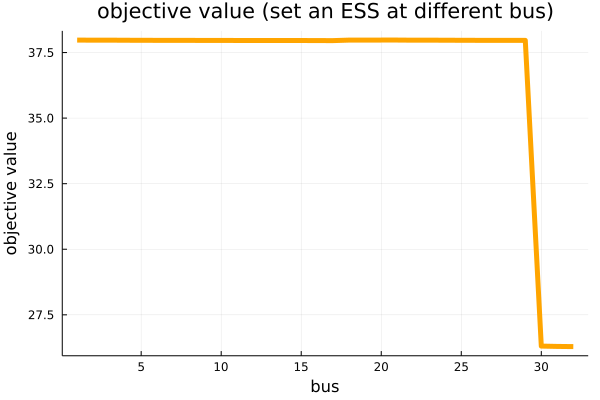

In [76]:
x = optimalvalue[:,1]; y = optimalvalue[:,2]; # These are the plotting data
objective_value_fig = plot(x, y, label = "",xlabel = "bus",ylabel = "objective value",linecolor=:"orange", w = 5, title = "objective value (set an ESS at different bus)")
Plots.savefig(objective_value_fig,"D:/asu/IEE 598/Project/Figure/objective_value_fig.png")
objective_value_fig

In [28]:
print(optimalvalue[25:32,:])

[25.0 37.9667535164715; 26.0 37.9649034864957; 27.0 37.96449555089342; 28.0 37.96351314921944; 29.0 37.96331184399994; 30.0 26.307650449995176; 31.0 26.29491025229971; 32.0 26.288166494760507]

In [85]:
optimalvalue

32×2 Matrix{Float64}:
  1.0  37.9743
  2.0  37.9714
  3.0  37.9719
  4.0  37.9685
  5.0  37.9658
  6.0  37.9649
  7.0  37.9635
  8.0  37.9641
  9.0  37.9603
 10.0  37.9623
 11.0  37.9595
 12.0  37.9577
 13.0  37.9581
  ⋮    
 21.0  37.9755
 22.0  37.9708
 23.0  37.9716
 24.0  37.9693
 25.0  37.9668
 26.0  37.9649
 27.0  37.9645
 28.0  37.9635
 29.0  37.9633
 30.0  26.3077
 31.0  26.2949
 32.0  26.2882

In [29]:
print("choose 32 bus to set a ESS")

choose 32 bus to set a ESS

## Figures of the Result

In [34]:
essopt_result = essopt(31)


Cone linearizations applied:  1552

Root node processing (before b&c):
  Real time             =    0.30 sec. (351.44 ticks)
Parallel b&c, 6 threads:
  Real time             =    0.00 sec. (0.00 ticks)
  Sync time (average)   =    0.00 sec.
  Wait time (average)   =    0.00 sec.
                          ------------
Total (root+branch&cut) =    0.30 sec. (351.44 ticks)
Version identifier: 20.1.0.0 | 2020-11-10 | 9bedb6d68
Tried aggregator 3 times.
MIQCP Presolve eliminated 4332 rows and 5306 columns.
MIQCP Presolve modified 348 coefficients.
Aggregator did 1762 substitutions.
Reduced MIQCP has 4032 rows, 4910 columns, and 14002 nonzeros.
Reduced MIQCP has 265 binaries, 0 generals, 0 SOSs, and 0 indicators.
Reduced MIQCP has 768 quadratic constraints.
Presolve time = 0.03 sec. (24.18 ticks)
Probing fixed 0 vars, tightened 1109 bounds.
Probing time = 0.03 sec. (11.73 ticks)
Clique table members: 11005.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.

Dict{String, Any} with 22 entries:
  "result_theta_OLTC" => [1.0 1.0 … 1.0 1.0]…
  "ObjectiveValue"    => 26.2882
  "result_Q"          => [0.052799 -0.0738193 … 0.25148 0.203623; 0.00624279 -0…
  "result_theta_IN"   => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
  "result_u_dch"      => [0.0 0.0 … 1.0 1.0]
  "result_theta_DE"   => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
  "result_r1"         => [1.1236 1.1236 … 1.1236 1.1236]
  "result_V"          => [1.06937 1.07246 … 1.12052 1.09152; 1.06915 1.0725 … 1…
  "result_Qg"         => [-0.0 -0.0 … -0.0 -0.0; -0.0 -0.0 … -0.0 -0.0; … ; -0.…
  "result_p_wt"       => [0.9 0.793001 … 0.82 0.95; 0.9 1.0 … 0.82 0.95]
  "result_p_dch"      => [-0.0 -0.0 … 1.86634e-10 1.83003e-10]
  "result_Pg"         => [-0.0 -0.0 … -0.0 -0.0; -0.0 -0.0 … -0.0 -0.0; … ; -0.…
  "DualStatus"        => NO_SOLUTION
  "PrimalStatus"      => FEASIBLE_POINT
  "TerminationStatus" => OPTIMAL
  "result_P"          => [0.160663 1.00582e-9 … 1.71165 0.951409; -0.0624467 -0…
  "re


Clique cuts applied:  417
Implied bound cuts applied:  32
Zero-half cuts applied:  5
Lift and project cuts applied:  5
Gomory fractional cuts applied:  13
Cone linearizations applied:  1905

Root node processing (before b&c):
  Real time             =    5.13 sec. (7126.23 ticks)
Parallel b&c, 6 threads:
  Real time             =    0.36 sec. (736.91 ticks)
  Sync time (average)   =    0.27 sec.
  Wait time (average)   =    0.00 sec.
                          ------------
Total (root+branch&cut) =    5.48 sec. (7863.14 ticks)


### Voltage

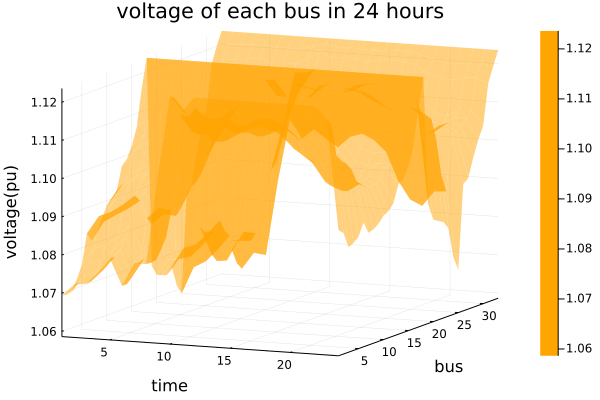

In [77]:
z = essopt_result["result_V"]
voltage_fig = plot(1:24,1:33,z,st =:surface,fillcolor=:"orange", fillalpha=0.5, xlabel = "time",ylabel = "bus",zlabel ="voltage(pu)", title = "voltage of each bus in 24 hours")
Plots.savefig(voltage_fig,"D:/asu/IEE 598/Project/Figure/voltage_fig.png")
voltage_fig

### Active Load

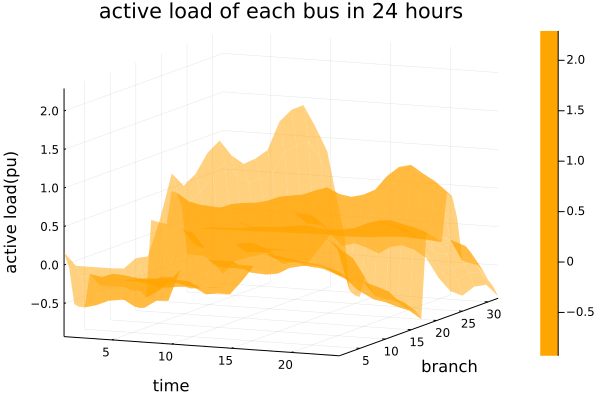

In [78]:
z = essopt_result["result_P"]
active_load_fig = plot(1:24,1:32,z,st =:surface, fillcolor=:"orange", fillalpha=0.5, xlabel = "time", ylabel = "branch", zlabel ="active load(pu)",title = "active load of each bus in 24 hours")
Plots.savefig(active_load_fig,"D:/asu/IEE 598/Project/Figure/active_load_fig.png")
active_load_fig

### Reactive Load

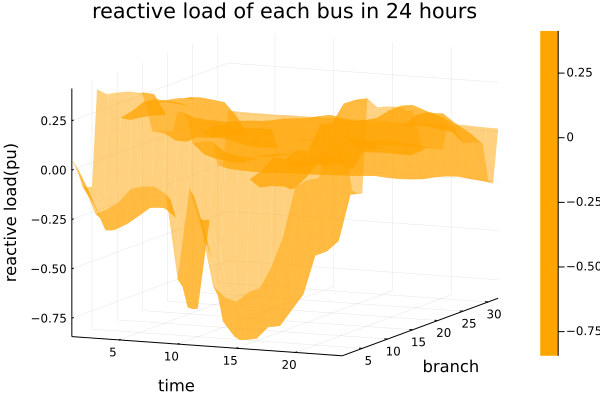

In [79]:
z = essopt_result["result_Q"]
reactive_load_fig = plot(1:24,1:32,z,st =:surface, fillcolor=:"orange", fillalpha=0.5, xlabel = "time", ylabel = "branch", zlabel ="reactive load(pu)",title = "reactive load of each bus in 24 hours")
Plots.savefig(reactive_load_fig,"D:/asu/IEE 598/Project/Figure/reactive_load_fig.png")
reactive_load_fig

### ESS Mode

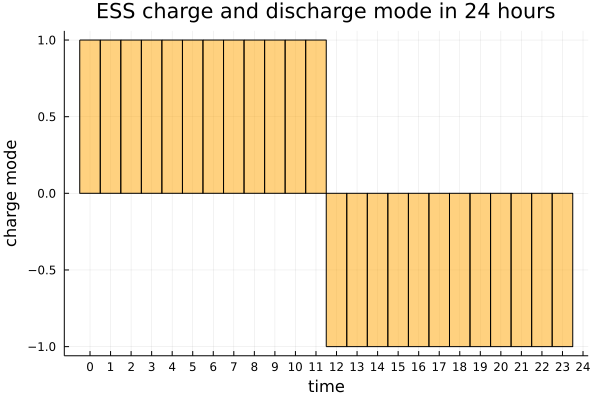

In [81]:
x = x_T 
y = essopt_result["result_u_ch"] - essopt_result["result_u_dch"]
ESS_mode_fig = bar(x, y,xticks=0:25, bar_width=1,fillcolor=:"orange", fillalpha=0.5, legend=false,xlabel = "time",ylabel = "charge mode",title = "ESS charge and discharge mode in 24 hours")
Plots.savefig(ESS_mode_fig,"D:/asu/IEE 598/Project/Figure/ESS_mode_fig.png")
ESS_mode_fig

### ESS Power

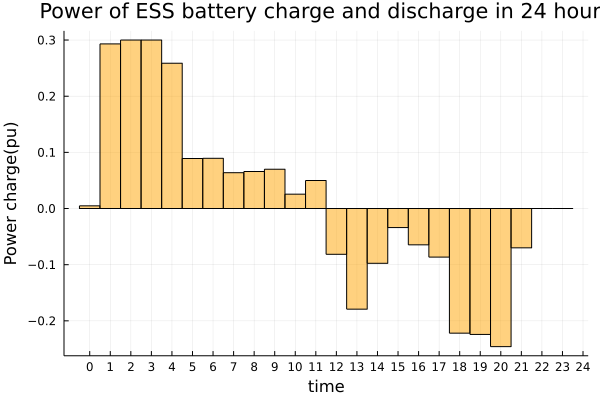

In [82]:
x = x_T 
y = essopt_result["result_p_ch"]-essopt_result["result_p_dch"]
ESS_power_fig = bar(x, y,xticks=0:25, bar_width=1,fillcolor=:"orange", fillalpha=0.5, legend=false,xlabel = "time",ylabel = "Power charge(pu)",title = "Power of ESS battery charge and discharge in 24 hours")
Plots.savefig(ESS_power_fig,"D:/asu/IEE 598/Project/Figure/ESS_power_fig.png")
ESS_power_fig

### ESS Storage

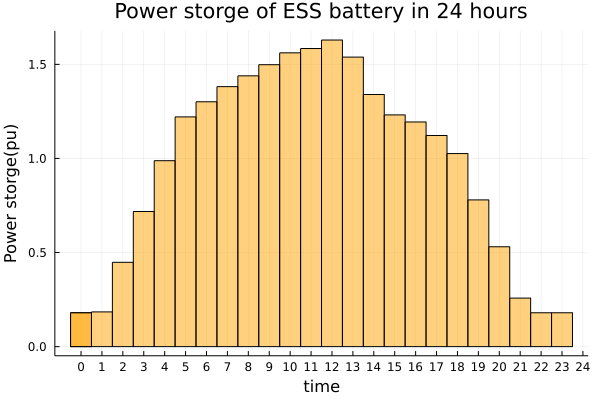

In [83]:
x = x_T 
y = essopt_result["result_E_ess"]
ESS_storage_fig = bar(x, y,xticks=0:25, bar_width=1,fillcolor=:"orange", fillalpha=0.5, legend=false,xlabel = "time",ylabel = "Power storge(pu)",title = "Power storge of ESS battery in 24 hours")
Plots.savefig(ESS_storage_fig,"D:/asu/IEE 598/Project/Figure/ESS_storage_fig.png")
ESS_storage_fig